**Librerías**

In [1]:
library(tseries)
library(TSA)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'TSA' was built under R version 4.0.4"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




**Apertura y corrección de datos**

In [2]:
bc<-data.frame(read.table("BitcoinHD-1Y.csv", sep=",", header = TRUE ))
bc_order <- apply(bc,2,rev)

In [3]:
transform(bc_order, Price = as.numeric(Price))

ï..Date,Price,Open,High,Low,Vol.,Change..
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
"Mar 17, 2020",5261.1,"5,030.20","5,432.80","4,946.50",1.89M,4.59%
"Mar 18, 2020",5361.4,"5,260.70","5,373.10","5,020.90",1.80M,1.91%
"Mar 19, 2020",6172.0,"5,359.20","6,379.50","5,256.00",2.18M,15.12%
"Mar 20, 2020",6205.3,"6,171.60","6,858.10","5,748.20",2.22M,0.54%
"Mar 21, 2020",6186.2,"6,205.60","6,438.30","5,887.00",1.64M,-0.31%
"Mar 22, 2020",5822.1,"6,186.90","6,394.40","5,771.20",1.48M,-5.89%
"Mar 23, 2020",6468.9,"5,822.00","6,564.70","5,710.80",1.88M,11.11%
"Mar 24, 2020",6744.6,"6,468.80","6,814.20","6,380.80",1.73M,4.26%
"Mar 25, 2020",6678.9,"6,744.80","6,930.20","6,474.60",1.52M,-0.97%


**Convertir a serie**

In [4]:
bc_l <- ts(as.numeric(bc_order[,2]), start =c(2020,3, 17), end = c(2021,3,17), frequency=365)
head(bc_l, 12)

[1] 5261.1 5361.4 6172.0 6205.3 6186.2 5822.1 6468.9 6744.6 6678.9 6725.1
[11] 6373.4 6233.7

**Análisis descriptivo**

In [5]:
start(bc_l)
end(bc_l)
class(bc_l)
head(time(bc_l),12)

[1] 2020    3

[1] 2021    3

[1] "ts"

[1] 2020.005 2020.008 2020.011 2020.014 2020.016 2020.019 2020.022 2020.025
 [9] 2020.027 2020.030 2020.033 2020.036

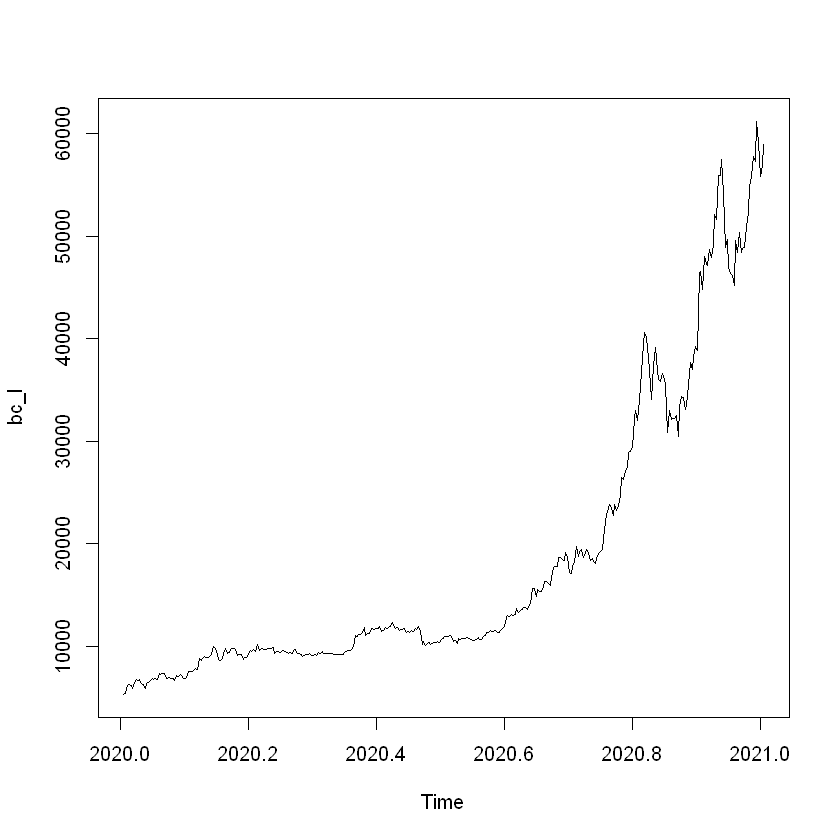

In [6]:
plot(bc_l)

### Clasificación

**Tendencia lineal**

**HO:** B1 igual a 0.

**Ha:** B1 diferente de 0.

alfa=0.05

In [7]:
tend<-lm(bc_l~time(bc_l), data=bc_l)

In [8]:
summary(tend)


Call:
lm(formula = bc_l ~ time(bc_l), data = bc_l)

Residuals:
     Min       1Q   Median       3Q      Max 
-10448.2  -7389.3   -945.9   5356.7  22989.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -82237472    2782405  -29.56   <2e-16 ***
time(bc_l)      40711       1377   29.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7626 on 364 degrees of freedom
Multiple R-squared:  0.706,	Adjusted R-squared:  0.7052 
F-statistic:   874 on 1 and 364 DF,  p-value: < 2.2e-16


*Modelo estimado*

* **p-valor:** 2.2e^-16
* **R^2 ajustada:** 0.7052 por lo que se ajusta al modelo lineal de buena manera.
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables y existe tendencia lineal.

**Modelo de tendencia polinómica**

**HO:** B1 igual a 0.

**Ha:** B1 diferente de 0.

alfa=0.05

In [9]:
tc<-as.numeric(time(bc_l))
tenc<-lm(bc_l~poly(tc, degree=3))
summary(tenc)


Call:
lm(formula = bc_l ~ poly(tc, degree = 3))

Residuals:
    Min      1Q  Median      3Q     Max 
-6260.0  -981.5  -219.6   571.5 10730.1 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            18296.9      123.8  147.76   <2e-16 ***
poly(tc, degree = 3)1 225446.2     2369.1   95.16   <2e-16 ***
poly(tc, degree = 3)2 126830.6     2369.1   53.54   <2e-16 ***
poly(tc, degree = 3)3  55236.2     2369.1   23.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2369 on 362 degrees of freedom
Multiple R-squared:  0.9718,	Adjusted R-squared:  0.9715 
F-statistic:  4155 on 3 and 362 DF,  p-value: < 2.2e-16


* **p-valor:** 2.2e^-16,
* **R^2 ajustada:** 0.9715, por lo que se ajusta al modelo de tendencia polinómica de buena manera.
* **MSE:** 
* **Conclusión:** Se rechazo Ho, dado que el p-valor es muy pequeño y menor que alfa. Por lo que si hay relación entre las variables por el modelo de tendencia polinómica cubica.

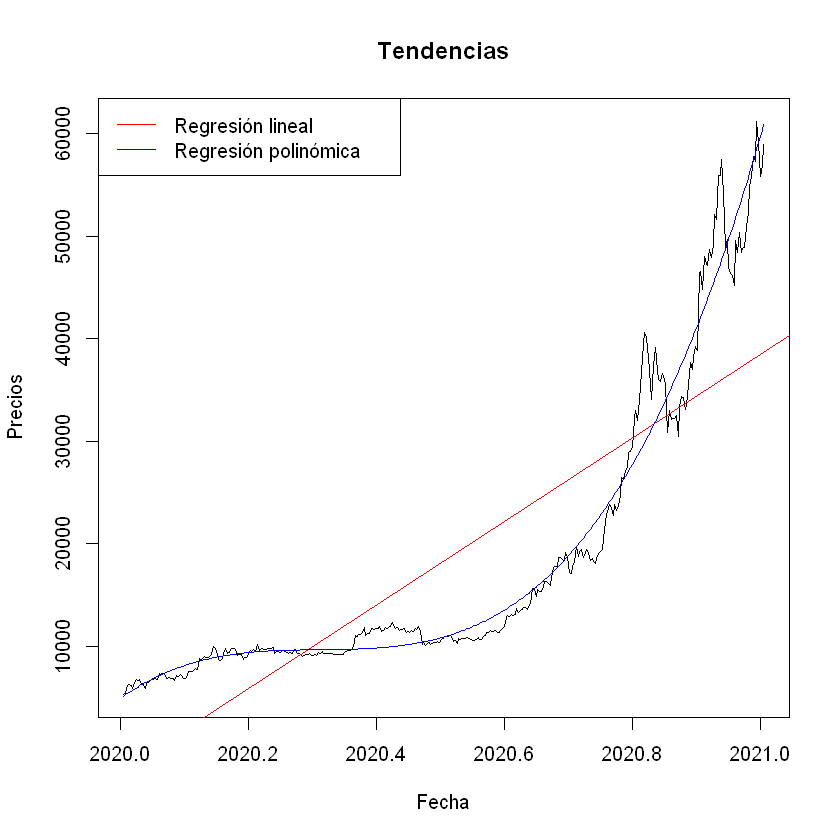

In [10]:
plot(bc_l,
    main = 'Tendencias',
    ylab = 'Precios',
    xlab = 'Fecha')
abline(tend, col="red")
lines(tc, fitted.values(tenc), 
      col="blue")
legend('topleft', 
       legend = c('Regresión lineal', 'Regresión polinómica'),
        col = c('red', 'blue'),
      lty = 1)

**Varianza**

**HO:** La serie NO es estacionaria en varianza

**Ha:** La serie SI es estacionaria en varianza

alfa=0.05

In [11]:
adf.test(bc_l, alternative="stationary")

Warning message in adf.test(bc_l, alternative = "stationary"):
"p-value greater than printed p-value"



	Augmented Dickey-Fuller Test

data:  bc_l
Dickey-Fuller = 0.066434, Lag order = 7, p-value = 0.99
alternative hypothesis: stationary


Dado que el p-valor es mayor que alfa, No se rechaza Ho, por lo que la serie NO es estacionaria en Varianza.

**Conclusión:** La serie es NO estacionaria en media ni varianza

## Correcciones

**Corrección 1**

In [12]:
c1 <- diff(log(bc_l))

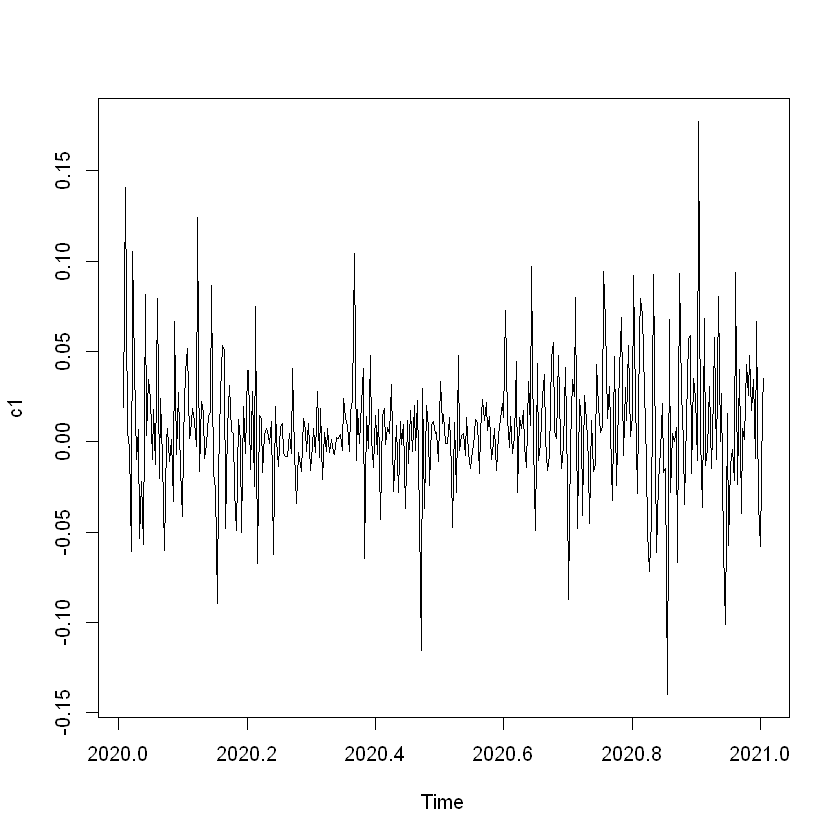

In [13]:
plot(c1)

**Tendencia**

In [14]:
tn<-lm(c1~time(c1))
summary(tn)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148759 -0.017729 -0.001304  0.015331  0.168344 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -12.515061  13.409865  -0.933    0.351
time(c1)      0.006197   0.006637   0.934    0.351

Residual standard error: 0.0366 on 363 degrees of freedom
Multiple R-squared:  0.002396,	Adjusted R-squared:  -0.000352 
F-statistic: 0.8719 on 1 and 363 DF,  p-value: 0.351


In [15]:
tc<-as.numeric(time(c1))
summary(lm(c1~poly(tc, degree=3)))


Call:
lm(formula = c1 ~ poly(tc, degree = 3))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.151669 -0.018166  0.000028  0.015964  0.166520 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.006618   0.001910   3.466 0.000592 ***
poly(tc, degree = 3)1  0.034179   0.036484   0.937 0.349480    
poly(tc, degree = 3)2  0.044992   0.036484   1.233 0.218302    
poly(tc, degree = 3)3 -0.061625   0.036484  -1.689 0.092065 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03648 on 361 degrees of freedom
Multiple R-squared:  0.01434,	Adjusted R-squared:  0.006147 
F-statistic:  1.75 on 3 and 361 DF,  p-value: 0.1563


No tiene tendencia lineal, entonces es estacionaria.

**Varianza**

In [16]:
adf.test(c1, alternative="stationary")

Warning message in adf.test(c1, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -6.8406, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


La serie es estacionaria en varianza

**Clasificación:** La serie C1 es estacionaria en media y varianza

## Modelado

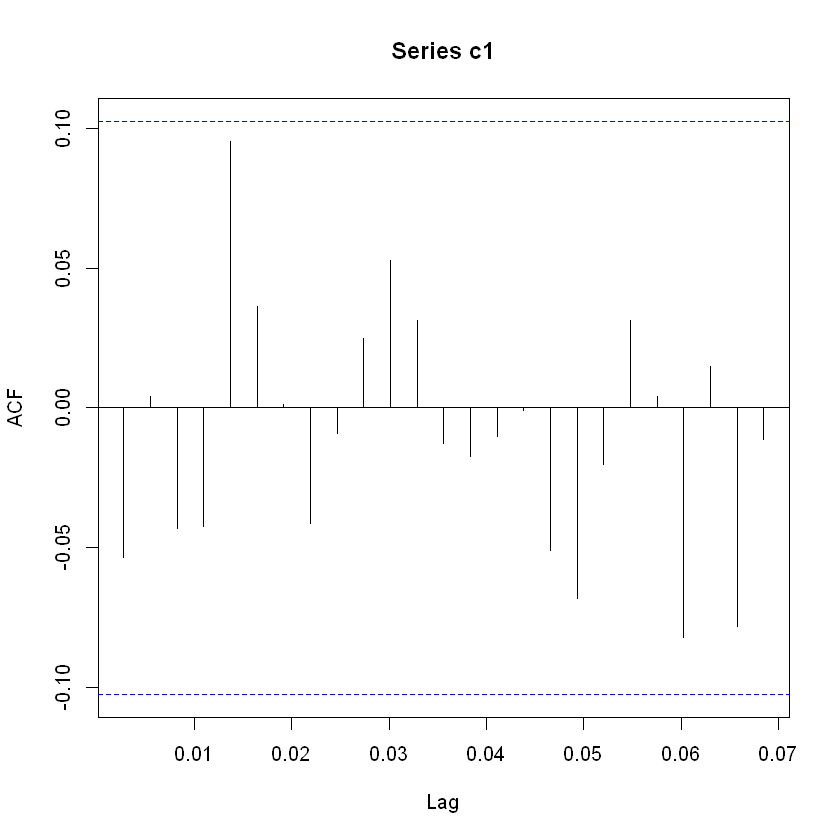

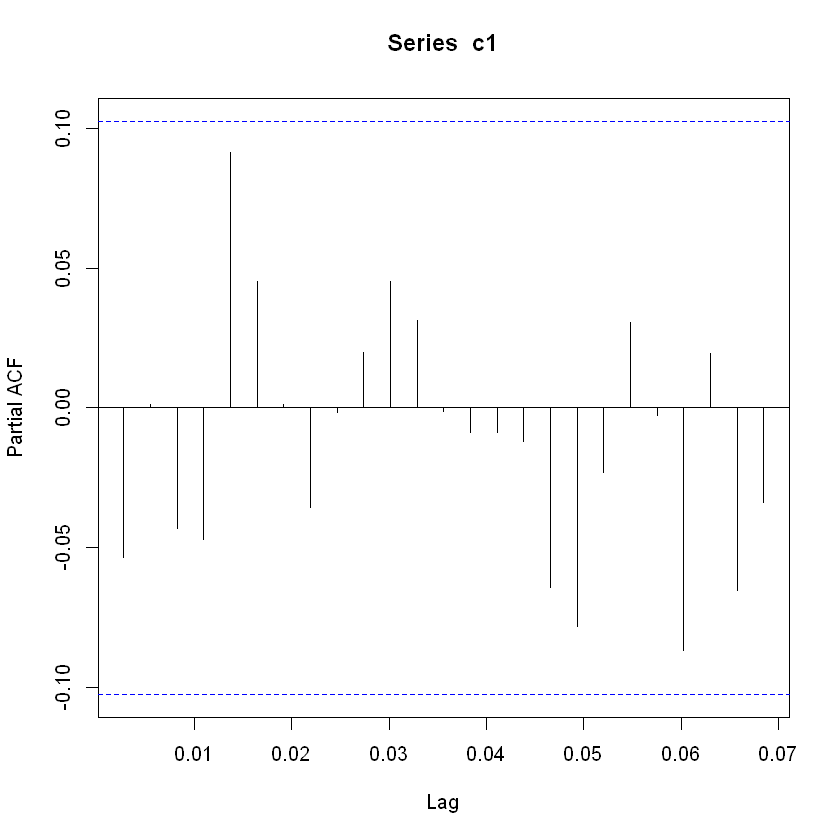

In [17]:
acf(c1) 
pacf(c1) 

**MODELO AR(𝑝)**

In [18]:
ar(c1)


Call:
ar(x = c1)


Order selected 0  sigma^2 estimated as  0.001339

In [39]:
AIC(arima(c1, order=c(0,0,0), method="ML"))

[1] -1375.868

* El orden del mejor AR: 0

* AIC del mejor AR: -1375.86

**MODELO MA(𝑞)**

In [42]:
aic0<-Inf # le das un numero muy grande
for (i in 1:20)
{
  aic1<-AIC(arima(c1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
MA.mejor
aic0 

[1] 1

[1] -1374.913

* El orden del mejor MA: 1
* AIC del mejor MA: -1374.91

**MODELO ARMA(p,q)**

In [46]:
arma.aic<-Inf
for(j in 1:8)
{
  for (i in 1:15)
  {
    print(j,i)
    aux<-AIC(arima(c1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
ARMA.mejor
arma.aic

[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 3
[1] 3
[1] 3


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 3
[1] 3
[1] 3


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 3
[1] 3
[1] 3


Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"


[1] 3
[1] 3
[1] 3
[1] 3
[1] 3
[1] 4
[1] 4
[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4
[1] 4
[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4
[1] 4
[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4
[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 4


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5
[1] 5
[1] 5
[1] 5
[1] 5
[1] 5
[1] 5
[1] 5
[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5
[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6
[1] 6
[1] 6
[1] 6
[1] 6
[1] 6
[1] 6
[1] 6
[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 6


Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7
[1] 7
[1] 7
[1] 7
[1] 7
[1] 7
[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7
[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 7


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8
[1] 8
[1] 8
[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 8


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 2 4

[1] -1374.657

* El orden del mejor ARMA: 2,4
* AIC del mejor ARMA: -1374.65

## Ruido blanco

In [47]:
res<-residuals(arima(c1, order=c(0,0,1), method = 'ML'))

**Media**

In [48]:
mean(res)

[1] 6.290115e-08

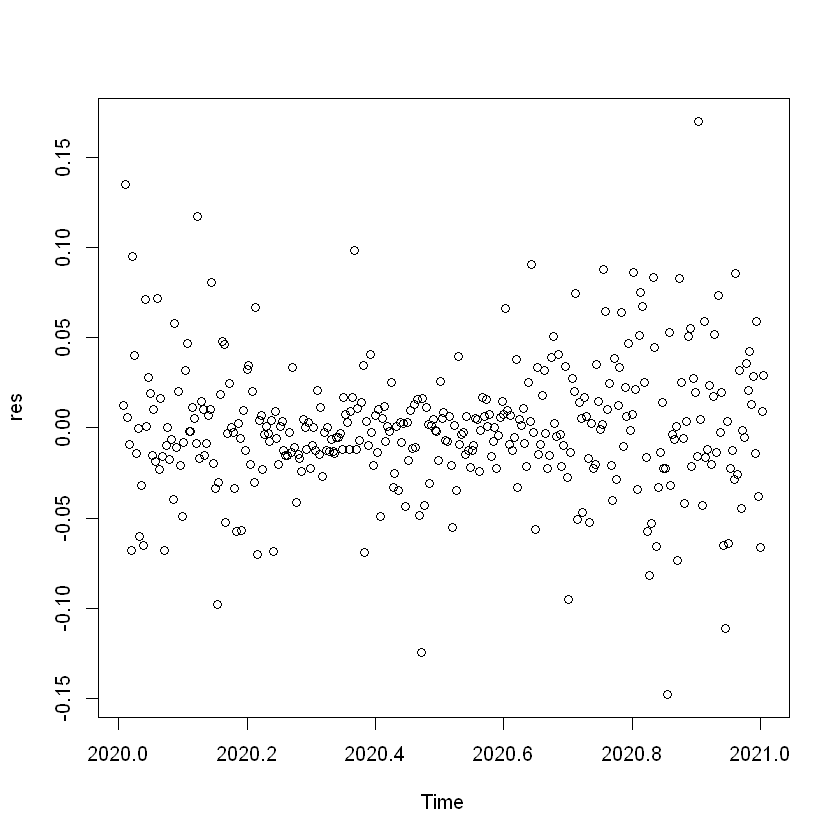

In [49]:
plot(res, type="p")

**Incorrelación**

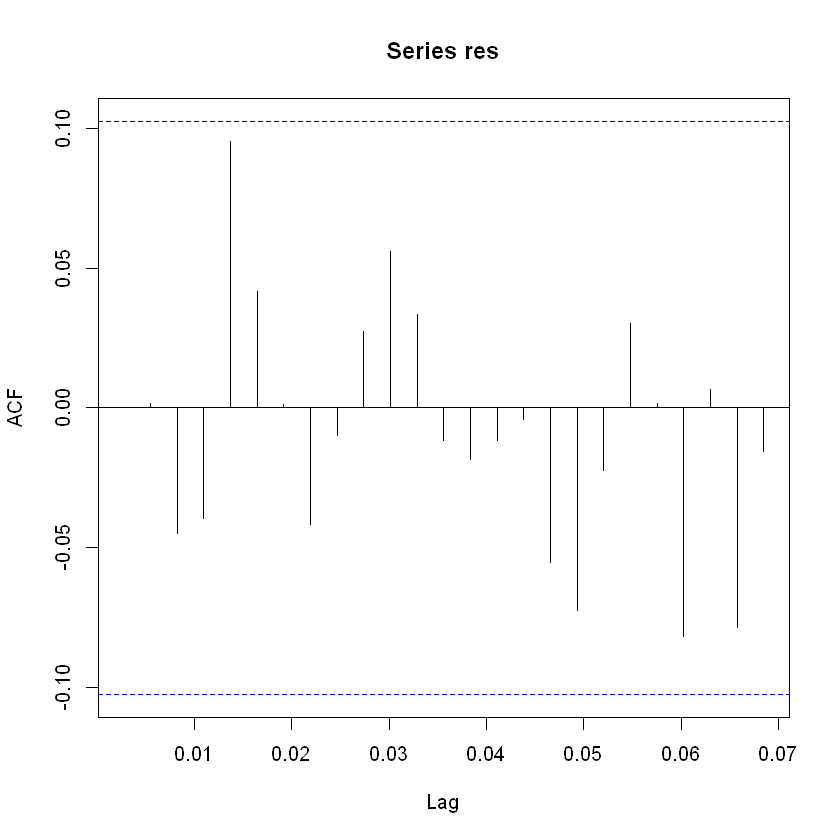

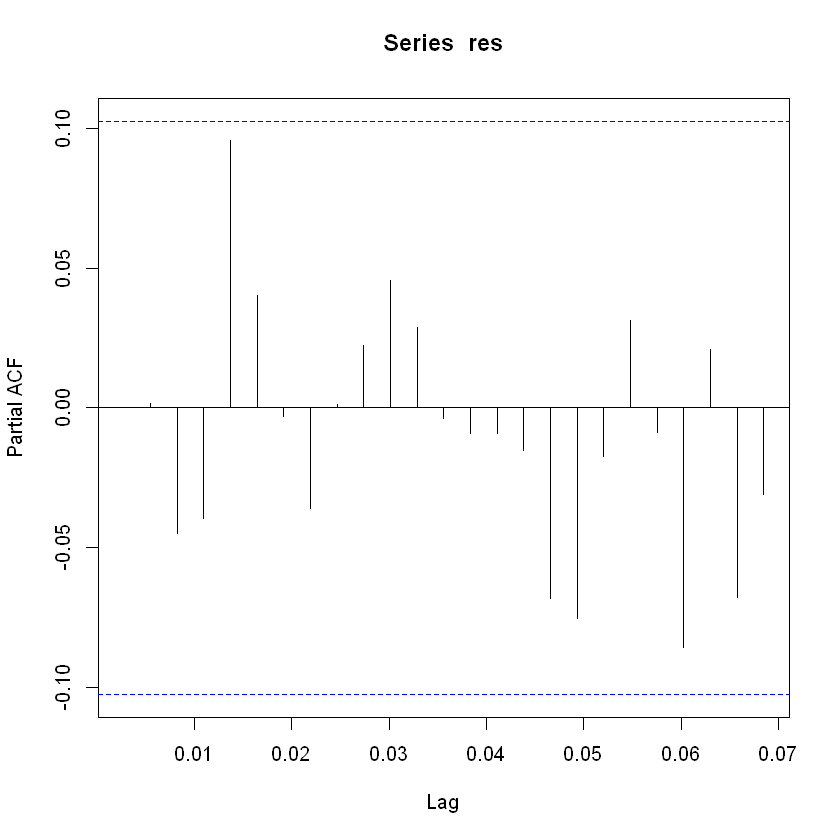

In [25]:
acf(res) 
pacf(res) 

**Incorrelación de forma analítica**

**HO:** Son independientes

**Ha:** Muestran alguna dependencia

alfa=0.05

In [50]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 9.9959e-07, df = 1, p-value = 0.9992


**Normalidad**

**HO:** Sigue una distribución normal

**Ha:** NO sigue una distribución normal

alfa=0.05

In [51]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.95029, p-value = 9.572e-10


## Predicciones

In [55]:
Pred <- predict(arima(bc_l, order=c(0, 1,1), method="ML"), n.ahead=20)$pred
head(Pred)

[1] 58921.87 58921.87 58921.87 58921.87 58921.87 58921.87

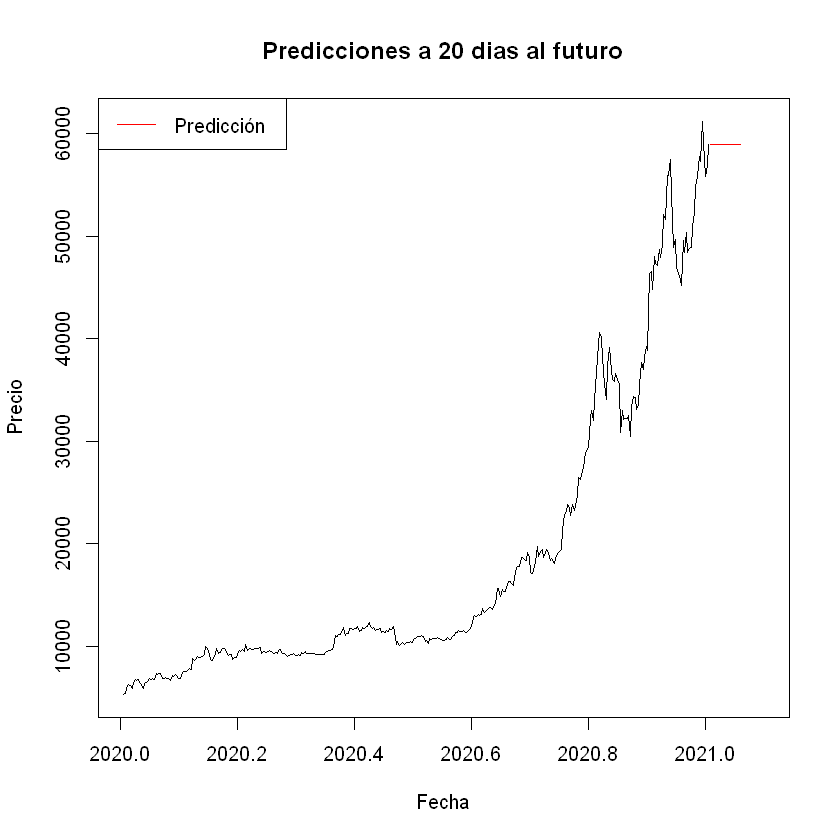

In [56]:
plot(bc_l,
    main = 'Predicciones a 20 dias al futuro',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2020.00547945205, 2021.1))
lines(Pred, 
      col="red")
legend('topleft', 
       legend = c('Predicción'),
        col = c('red'),
      lty = 1)

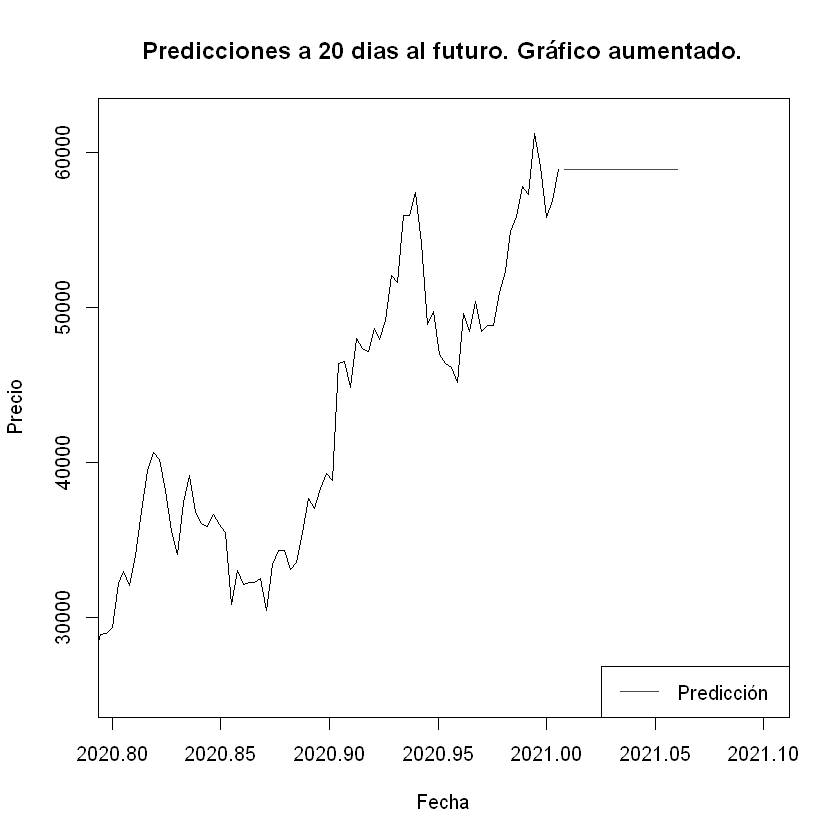

In [57]:
plot(bc_l,
    main = 'Predicciones a 20 dias al futuro. Gráfico aumentado.',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2020.80547945205, 2021.1),
    ylim = c(25000, 62000))
lines(Pred, 
      col="red")
legend('bottomright', 
       legend = c('Predicción'),
        col = c('red'),
      lty = 1)